In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

内容基本来自：https://www.redblobgames.com/grids/hexagons/

# 简介

1. cube coordinate 来源于正方体的体对角线的切平面。所以拥有三个轴。需要注意坐标轴的方向。
2. 为了统一和展示，全文采用的是平顶的正六边形。
3. 使用matplotlib进行可视化，内容是直接使用plot绘制的。
4. 需要的其他功能可以在画图部分进行封装。

# 坐标系转化

doubele_height类型和cube_coordinate相互转化

In [2]:
def doubleheight_to_cube(hexagon):
    x = hexagon.col
    z = (hexagon.row - hexagon.col) / 2
    y = -x-z
    return cube_hex(x, y, z)

def cube_to_doubleheight(cube):
    col = cube.x
    row = 2 * cube.z + cube.x
    return doubled_height_hex(col, row)

# 构造

坐标变换

## hex to pix

$$
\left[
 \begin{matrix}
   x \\
   y
  \end{matrix} 
\right]
= size \times
\left[
 \begin{matrix}
   \frac{3}{2} & 0 \\
    \frac{\sqrt{3}}{2} & \sqrt{3}
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   dx\\
   dz
  \end{matrix} 
\right]
$$

In [3]:
def flat_hex_to_pixel(hex):
    x = size *  3./2 * hex.dx
    y = (size * (sqrt(3)/2 * hex.dx  +  sqrt(3) * hex.dz))
    return Point(x, y)

## pix to hex

逆矩阵

$$
\left[
 \begin{matrix}
   dx \\
   dz
  \end{matrix} 
\right]
= size \times
\left[
 \begin{matrix}
   \frac{2}{3} & 0 \\
    -1/3 & \frac{\sqrt{3}}{3}
  \end{matrix} 
\right]
\left[
 \begin{matrix}
   dx\\
   dz
  \end{matrix} 
\right]
$$

In [4]:
def pixel_to_flat_hex(point):
    q = ( 2/3 * point.x) / size
    r = (-1/3 * point.x + sqrt(3)/3 * point.y) / size
    return cube_hex_round(point3(q, r))

# 定义

由于 $dx+dy+dz = 0$ ，可以忽略掉其中一个坐标，通常选择忽略 $dy$ ，这样的 **cube_hex** 就转化为 **axial_hex** ，其中 $dy = -dx-dz$ ，但为了确保可读性，仍然使用 **cube_hex**

In [5]:
class point():
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def __add__(self, r):
        return point(self.x+r.x,self.y+r.y)

    def __sub__(self, r):
        return point(self.x-r.x,self.y-r.y)
    
    def __repr__(self):
        return 'point({},{})'.format(self.x,self.y)

class point3():
    # class cube_hex 中有断言，则经过cube_hex_round转化之前的（x,y,z)使用point3临时保存。
    def __init__(self,x,y,z):
        self.x = x
        self.y = y
        self.z = z
    def __repr__(self):
        return 'point3({},{},{})'.format(self.x,self.y,self.z)
    
class cube_hex:
    # 初始化size = 1
    def __init__(self,dx,dy,dz,size = 1):
        self.dx = dx
        self.dy = dy  
        self.dz = dz
        self.size = size
        if dx+dy+dz != 0:
            raise Exception('六边形索引错误')
        
    def center(self):
        x = self.size*3/2*self.dx
        y = (math.sqrt(3)/2*self.dx+ math.sqrt(3)*self.dz)
        return point(x,y)
    
    def __str__(self):
        return "cube_hex({},{},{},[{}])".format(self.dx,self.dy,self.dz,self.size)
    def __repr__(self):
        return "cube_hex({},{},{},[{}])".format(self.dx,self.dy,self.dz,self.size)


# 临近点

In [6]:
def cube_hex_add(a,b):
    return cube_hex(a.dx+b.dx,a.dy+b.dy,a.dz+b.dz)

In [7]:
cube_hex_directions =  [
    cube_hex(+1, -1, 0), cube_hex(+1, 0, -1), cube_hex(0, +1, -1), 
    cube_hex(-1, +1, 0), cube_hex(-1, 0, +1), cube_hex(0, -1, +1), 
]

def cube_hex_direction(direction):
    return cube_hex_directions[direction]

def cube_hex_neighbor(a_cub_hex, direction):
    return cube_hex_add(a_cub_hex, cube_hex_direction(direction))

# 距离

In [8]:
def cube_distance(a,b):
    return (abs(a.dx - b.dx) + abs(a.dy - b.dy) + abs(a.dz - b.dz))/2

由于 $dx+dy+dz = 0$ ,等价于：

In [9]:
def cube_distance(a,b):
    return max(abs(a.dx - b.dx), abs(a.dy - b.dy), abs(a.dz - b.dz))

# 画图

In [10]:
def flat_hex_corner(center,size,i):
    angle_deg = 60 * i
    angle_rad = math.pi / 180 * angle_deg
    return point(center.x + size * math.cos(angle_rad),
                 center.y + size * math.sin(angle_rad))

## 画边 填色

In [11]:
def draw_hex(a_cub_hex,line_color = 'black',fill_color = False):
    center = a_cub_hex.center()
    size = a_cub_hex.size
    
    corner_list_x = []
    corner_list_y = []

    for i in range(6):
        corner_list_x.append(flat_hex_corner(center,size,i).x)
        corner_list_y.append(flat_hex_corner(center,size,i).y)
    
    #plt.plot(corner_list_x,corner_list_y,'*',c = 'red')
    plt.plot(corner_list_x+[corner_list_x[0]],corner_list_y+[corner_list_y[0]],c = line_color)
    if fill_color != False:
        plt.fill(corner_list_x+[corner_list_x[0]],corner_list_y+[corner_list_y[0]],c = fill_color)
    plt.xticks([])
    plt.yticks([])

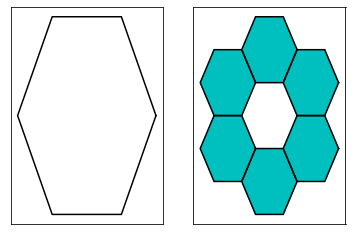

In [12]:
plt.subplot(121)
zero = cube_hex(0,0,0)
draw_hex(zero)

plt.subplot(122)
h_t = zero
for i in range(6):
    h_t = cube_hex_neighbor(zero,i)
    draw_hex(h_t,fill_color = 'c')
plt.show()

## 画地图（综合）

综合上述功能，其他功能需要则从这里添加。

In [13]:
def draw_map(cube_hex_list,line_color = 'black',fill_color = False, is_arrow = False):
    for i in cube_hex_list:
        draw_hex(i,line_color,fill_color)
    if is_arrow:
        for i in range(len(cube_hex_list)-1):
            x = cube_hex_list[i].center().x
            y = cube_hex_list[i].center().y
            dx = cube_hex_list[i+1].center().x - x
            dy = cube_hex_list[i+1].center().y - y
            plt.arrow(x,y,dx,dy,shape = 'full',width = 0.1,head_width = 0.5,length_includes_head = True,head_length = 0.7,ls ='-')

# range

$$-r \leq x \leq r$$
由距离定义$$distance = max(|a.dx - b.dx|, |a.dy - b.dy|, |a.dz - b.dz|)$$化简：
$$distance = max(|a.dx| , |a.dy|, |-a.dx -a.dy|) $$

In [14]:
def cube_hex_range(center_hex,radius):
    results = []
    for x in range(-radius,radius+1): # -r <= x <= r
        for y in range(max(-radius, -x-radius),min(+radius, -x+radius)+1): # 由距离定义，得 y 
            z = -x-y
            results.append(cube_hex_add(center_hex, cube_hex(x, y, z)))
    return results

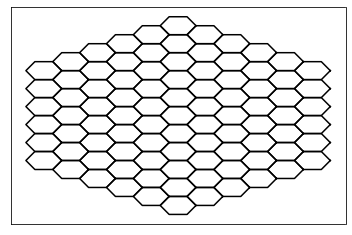

In [15]:
hex_range = cube_hex_range(zero,5)
for i in hex_range:
    draw_hex(i)

# 单环

In [16]:
def cube_hex_scale(a, k):
    return cube_hex(a.dx * k, a.dy * k, a.dz * k)

In [17]:
def cube_hex_ring(center_hex, radius):
    results = []
    # this code doesn't work for radius == 0; can you see why?
    cube = cube_hex_add(center_hex, 
                        cube_hex_scale(cube_hex_direction(4), radius))
    for i in range(6):
        for j in range(radius):
            cube = cube_hex_neighbor(cube, i)
            results.append(cube)
    return results

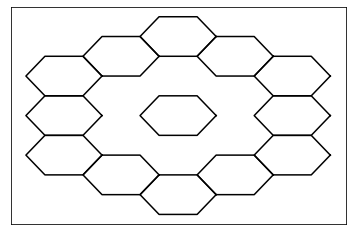

In [18]:
ring = cube_hex_ring(zero,2)
draw_hex(zero)
for i in ring:
    draw_hex(i)

# 螺旋环

只是存在螺旋顺序。

In [19]:
def cube_spiral(center, radius):
    results = [center]
    for i in range(radius+1):
        results = results + cube_hex_ring(center, i)
    return results

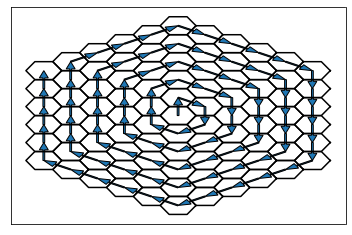

In [20]:
sp_hex = cube_spiral(zero,5)
draw_map(sp_hex,is_arrow = True)

# 舍入，将point3转化为cube_hex

In [21]:
def cube_hex_round(point3_hex):
    rx = round(point3_hex.x)
    ry = round(point3_hex.y)
    rz = round(point3_hex.z)

    x_diff = abs(rx - point3_hex.x)
    y_diff = abs(ry - point3_hex.y)
    z_diff = abs(rz - point3_hex.z)

    if x_diff > y_diff and x_diff > z_diff:
        rx = -ry-rz
    elif y_diff > z_diff:
        ry = -rx-rz
    else:
        rz = -rx-ry

    return cube_hex(rx, ry, rz)

# 画线（光栅，直线生成算法）

In [22]:
def lerp(a, b, t): # for floats
    return a + (b - a) * t

def cube_lerp(a, b, t): # for hexes
    
    return point3(lerp(a.dx, b.dx, t), 
                    lerp(a.dy, b.dy, t),
                    lerp(a.dz, b.dz, t))
    

def cube_linedraw(a, b):
    N = cube_distance(a, b)
    results = []
    for i in range(0,N+1):
        results.append(cube_hex_round(cube_lerp(a, b, 1.0/N * i)))
    return results

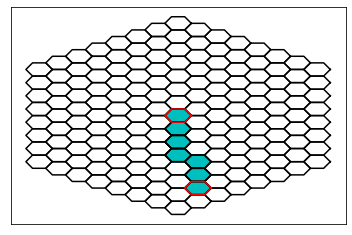

In [23]:
a = cube_hex(0,0,0)
b = cube_hex(1,5,-6)
c_hex = cube_linedraw(a,b)
for i in cube_hex_range(a,7):
    draw_hex(i)
for i in c_hex:
    draw_hex(i,fill_color = 'c')
draw_hex(a,'red')
draw_hex(b,'red')

# pix to hex 地图点映射

In [24]:
def pixel_to_flat_hex(point,size = 1):
    dx = ( 2/3 * point.x) / size
    dz = (-1/3 * point.x + math.sqrt(3)/3 * point.y) / size
    dy = -dx-dz
    return cube_hex_round(point3(dx, dy,dz))

假设在 $(5,1),(1.5,7.3)$ 的位置存在目标，寻找对应的正六边形。

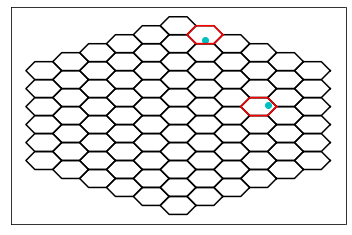

In [25]:
aim_point1 = point(5,1)
aim_cube_hex1 = pixel_to_flat_hex(aim_point1)

aim_point2 = point(1.5,7.3)
aim_cube_hex2 = pixel_to_flat_hex(aim_point2)

hex_range = cube_hex_range(zero,5)
draw_map(hex_range)
plt.scatter(aim_point1.x,aim_point1.y,c = 'c')
plt.scatter(aim_point2.x,aim_point2.y,c = 'c')
draw_hex(aim_cube_hex1,'red')
draw_hex(aim_cube_hex2,'red')